In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from tensorflow.keras.models import load_model

In [3]:
model_path = '/content/drive/MyDrive/Database/Model_VGG16.h5'

In [4]:
model = load_model(model_path)

In [5]:
import zipfile

# Nama file zip yang ingin diekstrak
zip_file_path = "/content/drive/MyDrive/Database/cotton_3.zip"

# Direktori tempat Anda ingin mengekstrak file
extract_to_directory = "/content"

# Membuka file zip
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Mengekstrak seluruh isi file ke direktori tertentu
    zip_ref.extractall(extract_to_directory)

print("File zip berhasil diekstrak.")

File zip berhasil diekstrak.


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

In [7]:
test_path = '/content/cotton_3/test'

In [8]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 100 images belonging to 4 classes.


In [10]:
test_steps = len(test_generator)
test_generator.reset()
predictions = model.predict(test_generator, steps=test_steps, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step


In [11]:
# Get class labels
folders = glob('/content/cotton_3/test/*')
folders = [folder.split('/')[-1] for folder in folders]

In [12]:
test_cm = confusion_matrix(true_classes, predicted_classes)
test_cr = classification_report(true_classes, predicted_classes, target_names=folders)

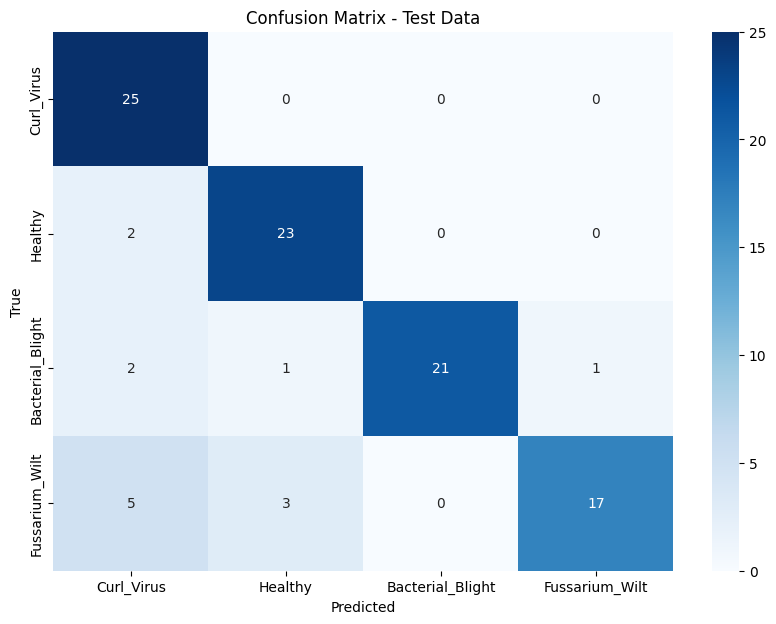

In [13]:
    plt.figure(figsize=(10, 7))
    sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', xticklabels=folders, yticklabels=folders)
    plt.title('Confusion Matrix - Test Data')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [14]:
print("Classification Report - Test Data")
print(test_cr)

Classification Report - Test Data
                  precision    recall  f1-score   support

      Curl_Virus       0.74      1.00      0.85        25
         Healthy       0.85      0.92      0.88        25
Bacterial_Blight       1.00      0.84      0.91        25
  Fussarium_Wilt       0.94      0.68      0.79        25

        accuracy                           0.86       100
       macro avg       0.88      0.86      0.86       100
    weighted avg       0.88      0.86      0.86       100

